 # _Assignment-3_  |  Sahil Sareen RA1911003010464

# __Lab Session__  
### 18CSE398J Machine Learning - Core Concepts with Applications

#### Analysing Sample E-Commerce Data to Predict Yearly Expenditure and What the company should focus on.

## __IMPORTS__

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
custdetails = pd.read_csv('ec.txt')

In [4]:
custdetails.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
custdetails.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [6]:
custdetails.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
custdetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
custdetails.memory_usage()

Index                    128
Email                   4000
Address                 4000
Avatar                  4000
Avg. Session Length     4000
Time on App             4000
Time on Website         4000
Length of Membership    4000
Yearly Amount Spent     4000
dtype: int64

In [9]:
custdetails.memory_usage().sum()

32128

In [10]:
print(custdetails.shape)

(500, 8)


## __Data Cleaning & Data Selection__

In [11]:
counts = custdetails.nunique()

to_del = ['Email','Address','Avatar']
custdetails.drop(to_del, axis=1, inplace=True)

In [12]:
custdetails.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [13]:
print(custdetails.shape)

(500, 5)


## __Data Exploration__

In [14]:
custdetails.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [15]:
custdetails.mean()

Avg. Session Length      33.053194
Time on App              12.052488
Time on Website          37.060445
Length of Membership      3.533462
Yearly Amount Spent     499.314038
dtype: float64

In [16]:
custdetails.var()

Avg. Session Length        0.985182
Time on App                0.988465
Time on Website            1.021088
Length of Membership       0.998556
Yearly Amount Spent     6290.834572
dtype: float64

In [17]:
custdetails.skew()

Avg. Session Length    -0.032175
Time on App            -0.089121
Time on Website         0.012142
Length of Membership   -0.106608
Yearly Amount Spent     0.034790
dtype: float64

In [18]:
custdetails.kurtosis()

Avg. Session Length     0.011862
Time on App             0.125081
Time on Website        -0.098287
Length of Membership    0.349010
Yearly Amount Spent     0.463976
dtype: float64

In [19]:
custdetails.min()

Avg. Session Length      29.532429
Time on App               8.508152
Time on Website          33.913847
Length of Membership      0.269901
Yearly Amount Spent     256.670582
dtype: float64

In [20]:
custdetails.max()

Avg. Session Length      36.139662
Time on App              15.126994
Time on Website          40.005182
Length of Membership      6.922689
Yearly Amount Spent     765.518462
dtype: float64

In [21]:
custdetails.median()

Avg. Session Length      33.082008
Time on App              11.983231
Time on Website          37.069367
Length of Membership      3.533975
Yearly Amount Spent     498.887875
dtype: float64

In [22]:
custdetails.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


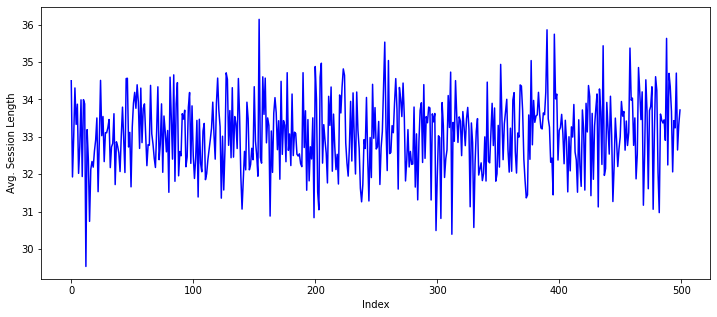

In [23]:
custdetails['Avg. Session Length'].plot(figsize=(12, 5), color='blue')

plt.xlabel('Index')
plt.ylabel('Avg. Session Length');

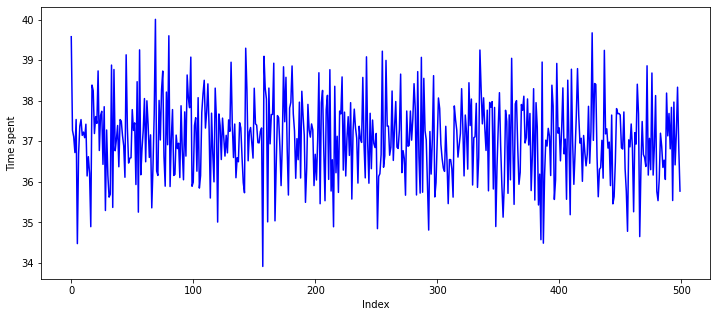

In [24]:
custdetails['Time on Website'].plot(figsize=(12, 5), color='blue')

plt.xlabel('Index')
plt.ylabel('Time spent');

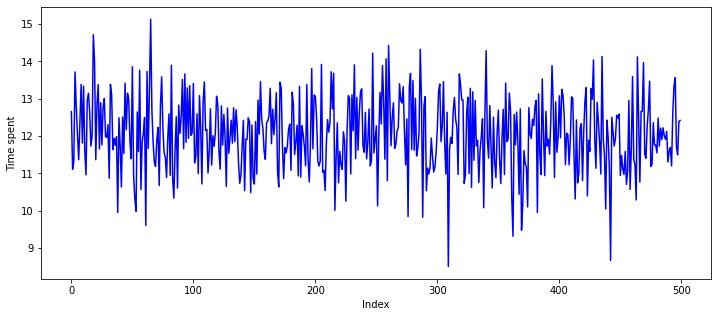

In [25]:
custdetails['Time on App'].plot(figsize=(12, 5), color='blue')

plt.xlabel('Index')
plt.ylabel('Time spent');

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Avg. Session Length'>

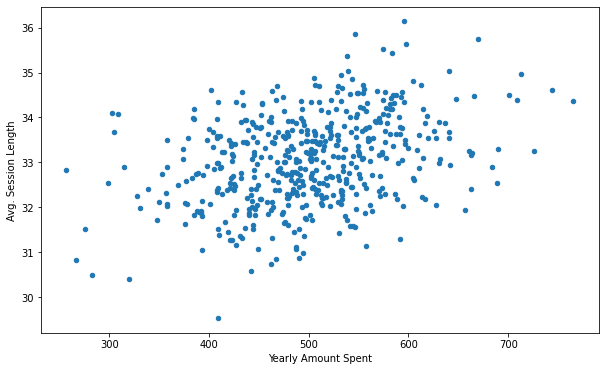

In [26]:
custdetails.plot.scatter('Yearly Amount Spent', 'Avg. Session Length', figsize=(10, 6))

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Time on Website'>

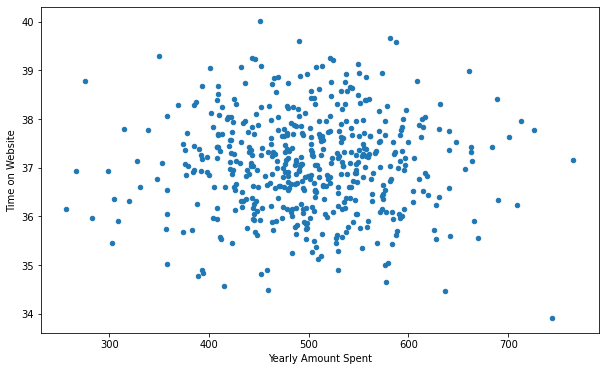

In [27]:
custdetails.plot.scatter('Yearly Amount Spent', 'Time on Website', figsize=(10, 6))

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Time on App'>

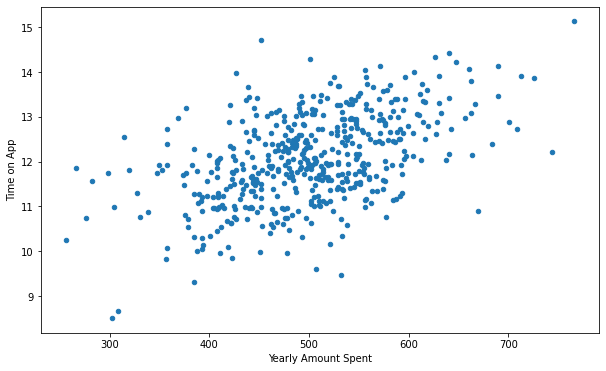

In [28]:
custdetails.plot.scatter('Yearly Amount Spent', 'Time on App', figsize=(10, 6))

<AxesSubplot:>

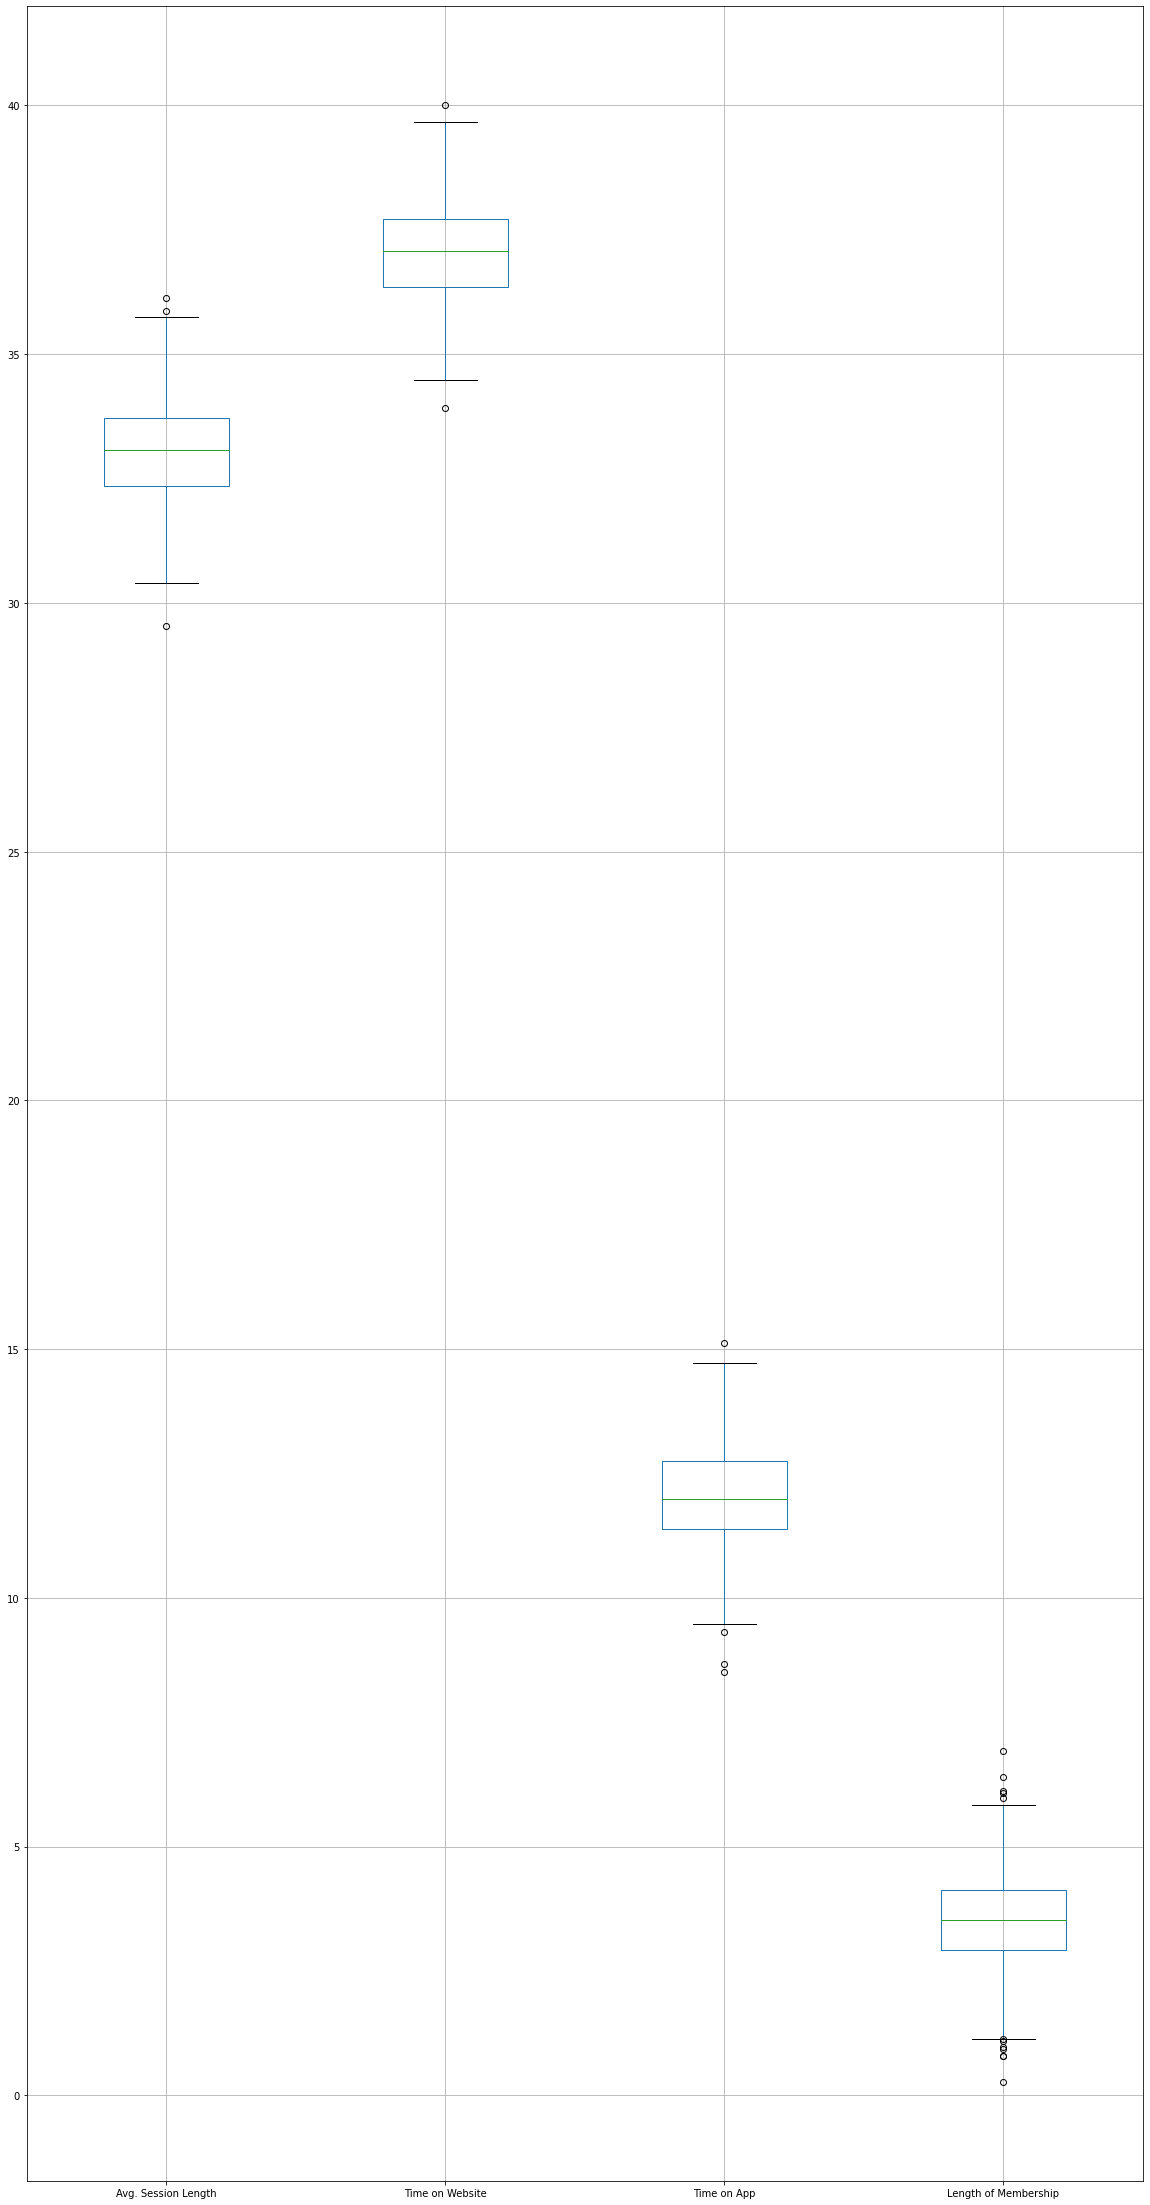

In [29]:
custdetails[['Avg. Session Length','Time on Website','Time on App','Length of Membership']].boxplot(figsize=(20, 40))

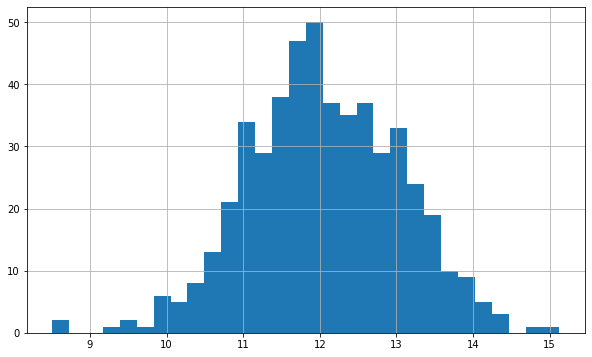

In [30]:
custdetails['Time on App'].hist(bins=30, figsize=(10, 6));

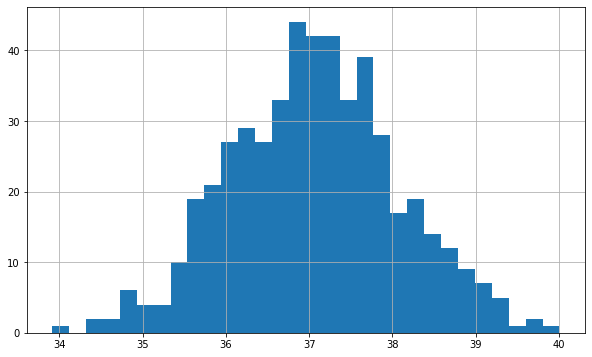

In [31]:
custdetails['Time on Website'].hist(bins=30, figsize=(10, 6));

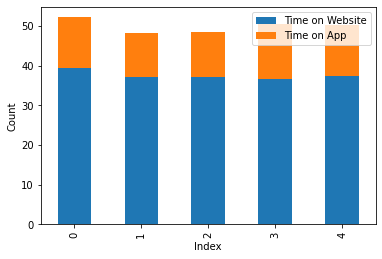

In [32]:
ax = custdetails[['Time on Website', 'Time on App']][:5].plot.bar(stacked=True)

ax.set_xlabel("Index")
ax.set_ylabel("Count");

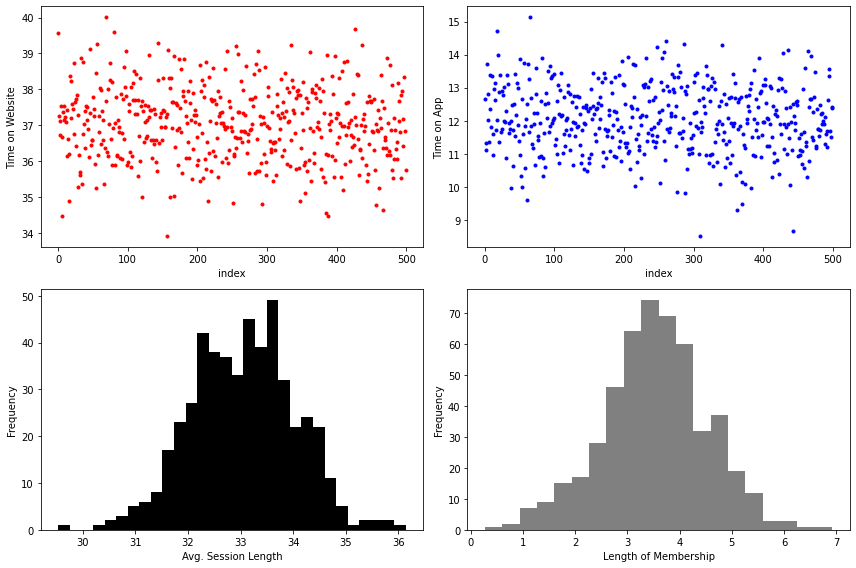

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

custdetails['Time on Website'].plot(ax = axes[0][0], style='.', color='red') # top left
custdetails['Time on App'].plot(ax = axes[0][1], style='.', color='blue') # top right

custdetails['Avg. Session Length'].plot.hist(bins=30, ax = axes[1][0], color='black') # bottom left
custdetails['Length of Membership'].plot.hist(bins=20, ax = axes[1][1], color='gray') # bottom right

axes[0][0].set_xlabel('index')
axes[0][1].set_xlabel('index')
axes[1][0].set_xlabel('Avg. Session Length')
axes[1][1].set_xlabel('Length of Membership')

axes[0][0].set_ylabel('Time on Website')
axes[0][1].set_ylabel('Time on App')

fig.tight_layout()

In [34]:
import seaborn as sns

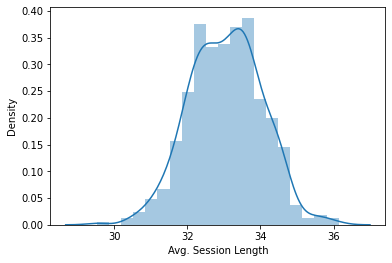

In [35]:
sns.distplot(custdetails['Avg. Session Length']);

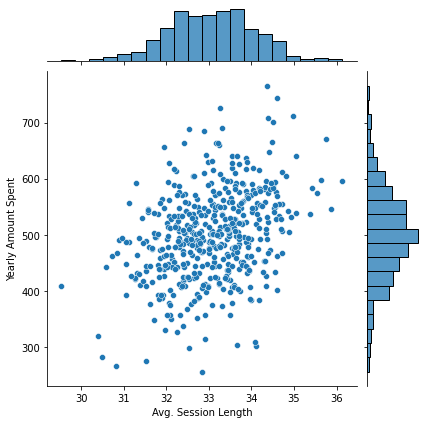

In [36]:
sns.jointplot(custdetails['Avg. Session Length' ],custdetails['Yearly Amount Spent'])

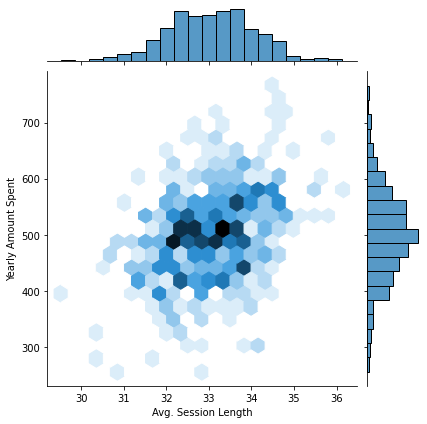

In [37]:
sns.jointplot(custdetails['Avg. Session Length'],custdetails['Yearly Amount Spent'],kind='hex')

In [38]:
print("Skewness: %f" % custdetails['Avg. Session Length'].skew())
print("Kurtosis: %f" % custdetails['Avg. Session Length'].kurt())

Skewness: -0.032175
Kurtosis: 0.011862


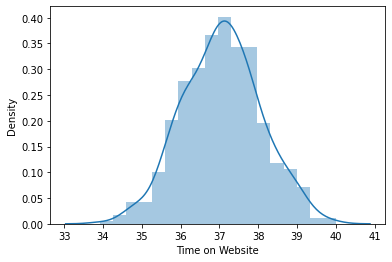

In [39]:
sns.distplot(custdetails['Time on Website']);

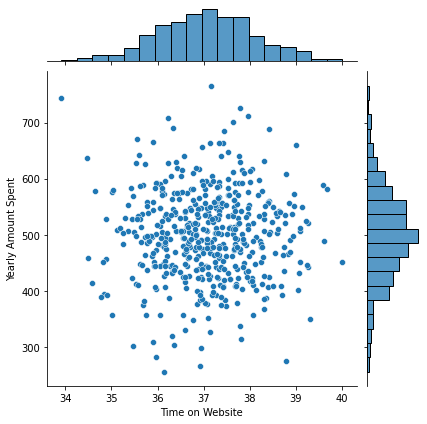

In [40]:
sns.jointplot(custdetails['Time on Website' ],custdetails['Yearly Amount Spent'])

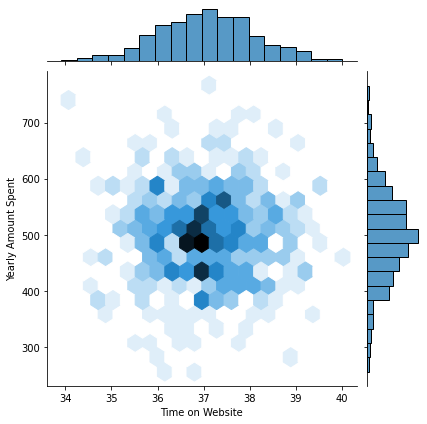

In [41]:
sns.jointplot(custdetails['Time on Website'],custdetails['Yearly Amount Spent'],kind='hex')

In [42]:
print("Skewness: %f" % custdetails['Time on Website'].skew())
print("Kurtosis: %f" % custdetails['Time on Website'].kurt())

Skewness: 0.012142
Kurtosis: -0.098287


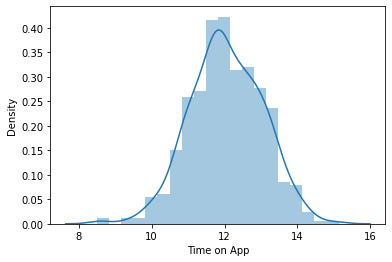

In [43]:
sns.distplot(custdetails['Time on App']);

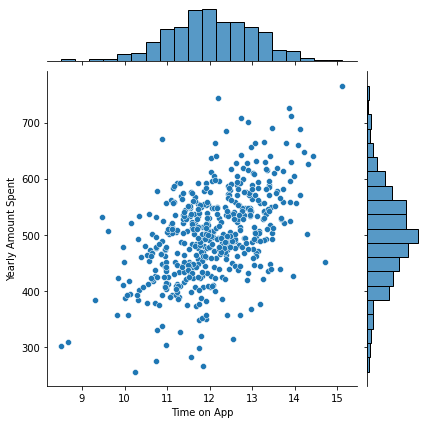

In [44]:
sns.jointplot(custdetails['Time on App'],custdetails['Yearly Amount Spent'])

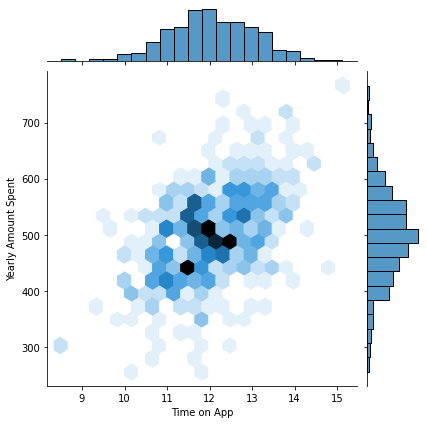

In [45]:
sns.jointplot(custdetails['Time on App'],custdetails['Yearly Amount Spent'],kind='hex')

In [46]:
print("Skewness: %f" % custdetails['Time on App'].skew())
print("Kurtosis: %f" % custdetails['Time on App'].kurt())

Skewness: -0.089121
Kurtosis: 0.125081


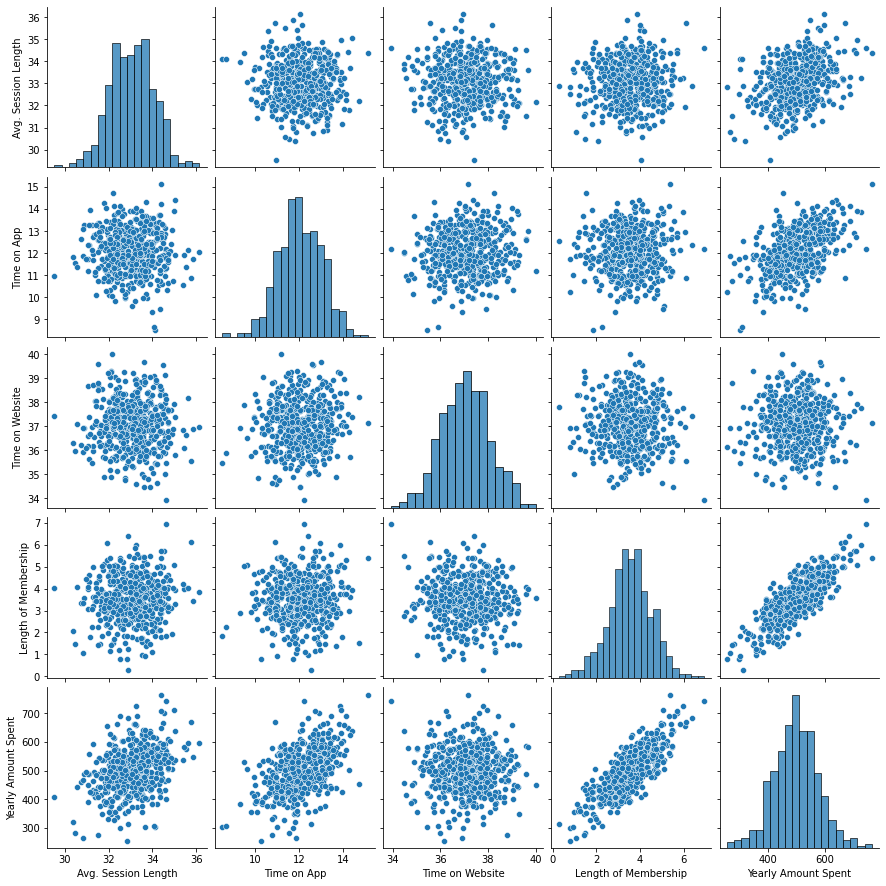

In [47]:
sns.pairplot(custdetails)

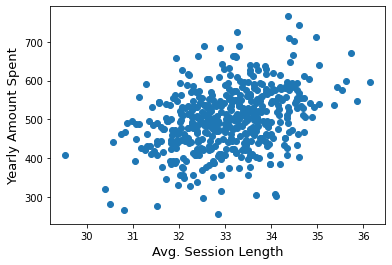

In [48]:
fig, ax = plt.subplots()
ax.scatter(x = custdetails['Avg. Session Length'], y = custdetails['Yearly Amount Spent'])
plt.ylabel('Yearly Amount Spent', fontsize=13)
plt.xlabel('Avg. Session Length', fontsize=13)
plt.show()

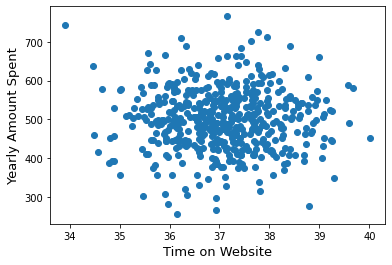

In [49]:
fig, ax = plt.subplots()
ax.scatter(x = custdetails['Time on Website'], y = custdetails['Yearly Amount Spent'])
plt.ylabel('Yearly Amount Spent', fontsize=13)
plt.xlabel('Time on Website', fontsize=13)
plt.show()

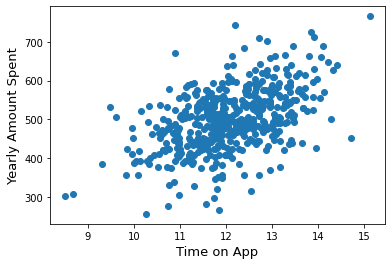

In [50]:
fig, ax = plt.subplots()
ax.scatter(x = custdetails['Time on App'], y = custdetails['Yearly Amount Spent'])
plt.ylabel('Yearly Amount Spent', fontsize=13)
plt.xlabel('Time on App', fontsize=13)
plt.show()


 mu = 37.06 and sigma = 1.01



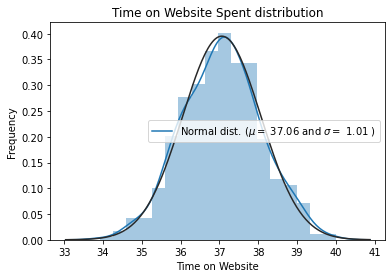

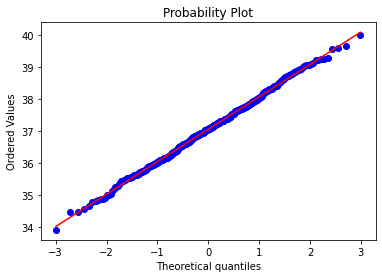

In [51]:
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(custdetails['Time on Website'] , fit=norm);

(mu, sigma) = norm.fit(custdetails['Time on Website'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Time on Website Spent distribution')

fig = plt.figure()
res = stats.probplot(custdetails['Time on Website'], plot=plt)
plt.show()


 mu = 12.05 and sigma = 0.99



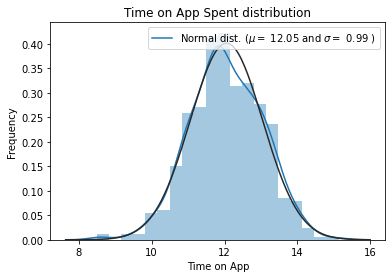

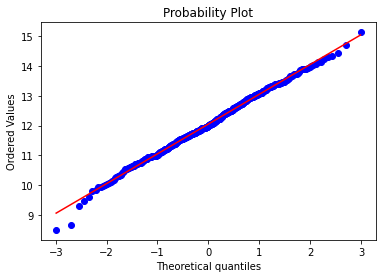

In [52]:
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(custdetails['Time on App'] , fit=norm);

(mu, sigma) = norm.fit(custdetails['Time on App'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Time on App Spent distribution')

fig = plt.figure()
res = stats.probplot(custdetails['Time on App'], plot=plt)
plt.show()


 mu = 499.31 and sigma = 79.24



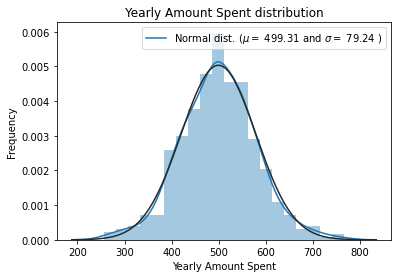

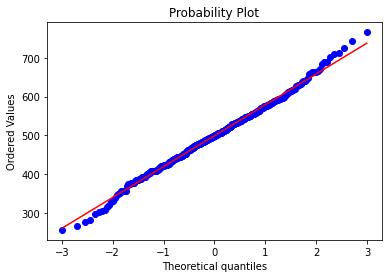

In [53]:
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(custdetails['Yearly Amount Spent'] , fit=norm);

(mu, sigma) = norm.fit(custdetails['Yearly Amount Spent'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Yearly Amount Spent distribution')

fig = plt.figure()
res = stats.probplot(custdetails['Yearly Amount Spent'], plot=plt)
plt.show()

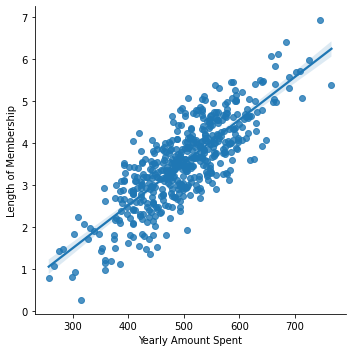

In [54]:
sns.lmplot(x='Yearly Amount Spent',y ='Length of Membership', data=custdetails)

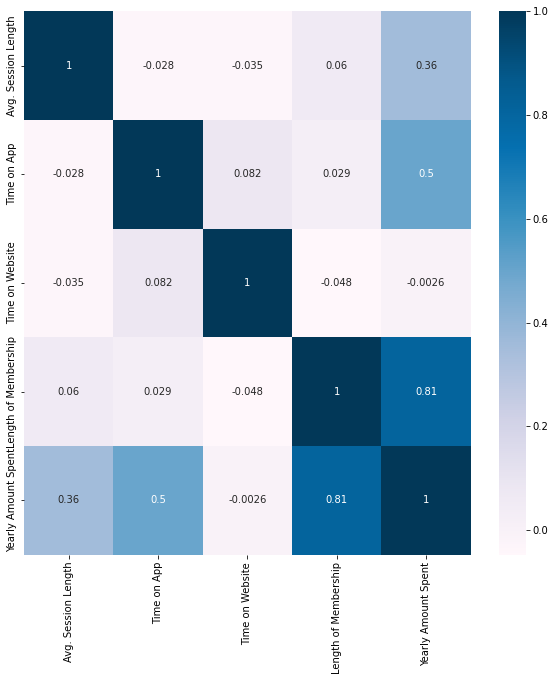

In [55]:
plt.figure(figsize=(10,10))
cor = custdetails.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [56]:
cor_target = abs(cor["Yearly Amount Spent"])

relevant_features = cor_target[cor_target>0.2]

names = [index for index, value in relevant_features.iteritems()]

names.remove('Yearly Amount Spent')

print(names)
print(len(names))

['Avg. Session Length', 'Time on App', 'Length of Membership']
3


## __Model Building__

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
y = custdetails['Yearly Amount Spent']

In [59]:
X = custdetails[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [61]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 4)
(150, 4)
(350,)
(150,)


In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lr = LinearRegression()

In [64]:
lr.fit(X_train,y_train)

LinearRegression()

In [65]:
predictions = lr.predict(X_test)

print("Actual Yearly Amount Spent:- ", y_test)
print("Model Predicted Value:- ", predictions)

Actual Yearly Amount Spent:-  18     452.315675
361    401.033135
104    410.069611
4      599.406092
156    586.155870
          ...    
147    479.731938
346    488.387526
423    461.112248
17     407.704548
259    375.398455
Name: Yearly Amount Spent, Length: 150, dtype: float64
Model Predicted Value:-  [456.44186104 402.72005312 409.2531539  591.4310343  590.01437275
 548.82396607 577.59737969 715.44428115 473.7893446  545.9211364
 337.8580314  500.38506697 552.93478041 409.6038964  765.52590754
 545.83973731 693.25969124 507.32416226 573.10533175 573.2076631
 397.44989709 555.0985107  458.19868141 482.66899911 559.2655959
 413.00946082 532.25727408 377.65464817 535.0209653  447.80070905
 595.54339577 667.14347072 511.96042791 573.30433971 505.02260887
 565.30254655 460.38785393 449.74727868 422.87193429 456.55615271
 598.10493696 449.64517443 615.34948995 511.88078685 504.37568058
 515.95249276 568.64597718 551.61444684 356.5552241  464.9759817
 481.66007708 534.2220025  256.28674

In [66]:
print(X_train)
print(y_test)

     Avg. Session Length  Time on App  Time on Website  Length of Membership
202            31.525752    11.340036        37.039514              3.811248
428            31.862741    14.039867        37.022269              3.738225
392            33.258238    11.514949        37.128039              4.662845
86             33.877779    12.517666        37.151921              2.669942
443            33.025020    12.504220        37.645839              4.051382
..                   ...          ...              ...                   ...
63             32.789773    11.670066        37.408748              3.414688
326            33.217188    10.999684        38.442767              4.243813
337            31.827979    12.461147        37.428997              2.974737
11             33.879361    11.584783        37.087926              3.713209
351            32.189845    11.386776        38.197483              4.808320

[350 rows x 4 columns]
18     452.315675
361    401.033135
104    410.06961

## __Model Evaluation__

In [67]:
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


Text(0, 0.5, 'Predicted Y')

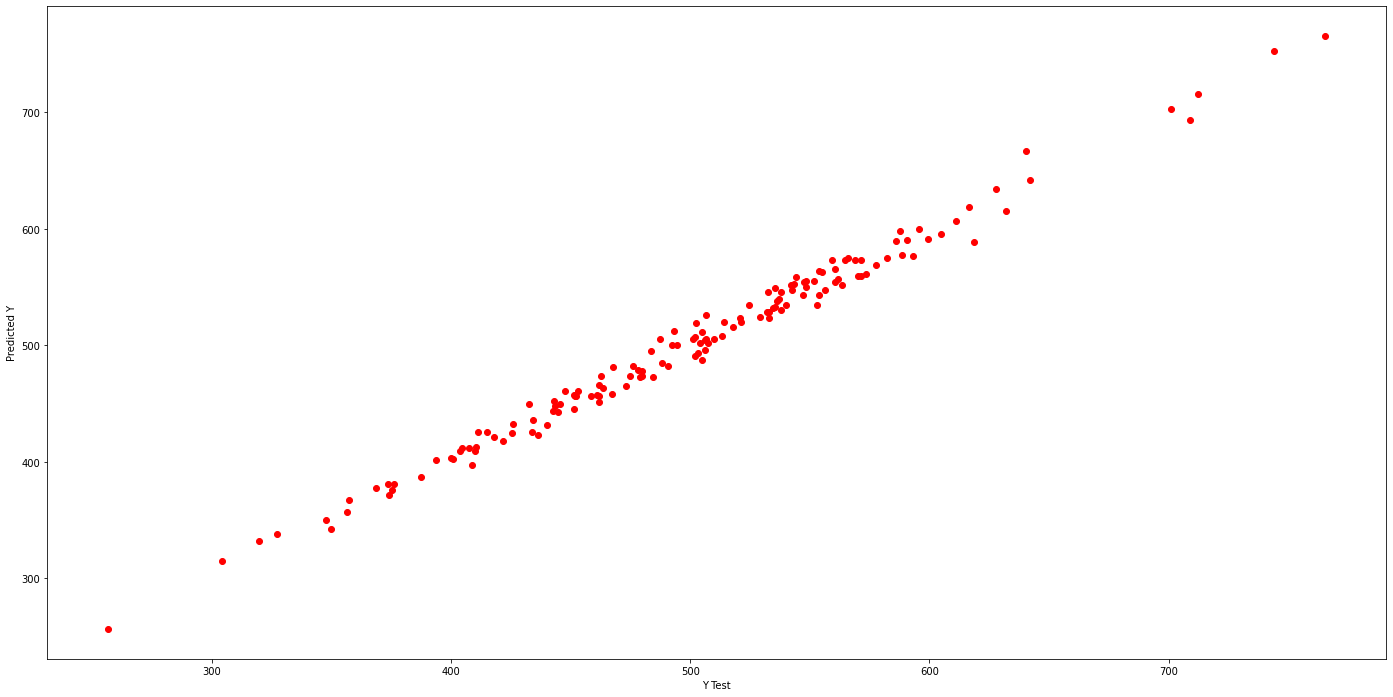

In [68]:
fig = plt.figure(figsize=(24, 12))
plt.scatter(y_test,predictions, color='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [69]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430847
MSE: 79.81305165097474
RMSE: 8.93381506697865


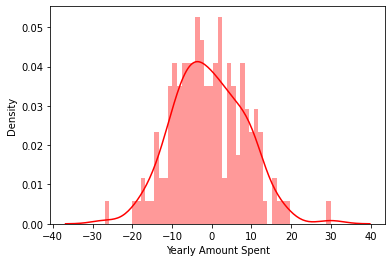

In [70]:
sns.distplot((y_test-predictions),bins=50, color='r');

In [71]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=5)
scores

array([0.97210596, 0.98405431, 0.98524053, 0.98019685, 0.97826085])

In [72]:
len(X_train.columns)

4

In [73]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

hyper_params = [{'n_features_to_select': list(range(1, 4))}]

lr = LinearRegression()
lr.fit(X_train, y_train)
rfe = RFE(lr)             

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)   

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

In [74]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003104,0.000205,0.000928,1.447027e-04,1,{'n_features_to_select': 1},0.695316,0.616568,0.615684,0.698713,...,0.639784,0.049365,3,0.645714,0.665714,0.663534,0.637169,0.674196,0.657265,0.013672
1,0.002601,0.000490,0.000932,1.375961e-04,2,{'n_features_to_select': 2},0.881196,0.862801,0.850271,0.878406,...,0.857434,0.024201,2,0.862125,0.866850,0.869570,0.858480,0.876381,0.866681,0.006172
2,0.002116,0.000230,0.001001,7.776979e-07,3,{'n_features_to_select': 3},0.975853,0.974426,0.983959,0.989176,...,0.980393,0.005468,1,0.982906,0.983395,0.981245,0.978700,0.982331,0.981715,0.001669


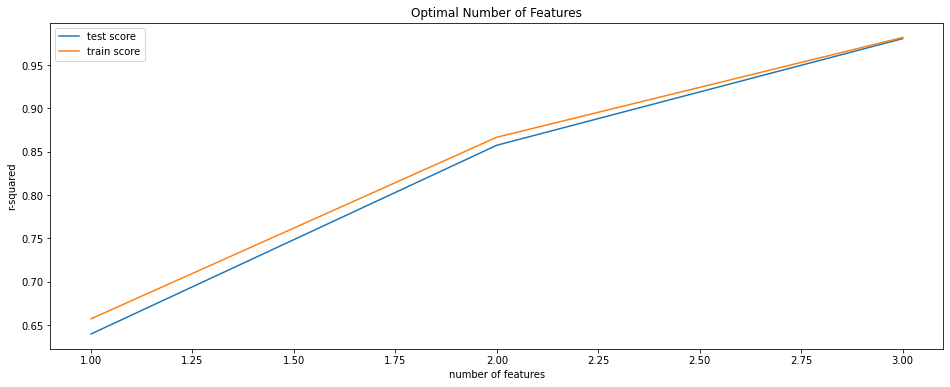

In [75]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [76]:
coeffecients = pd.DataFrame(lr.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [77]:
def cost(theta_0, theta_1):
    
    X = custdetails['Time on Website'].values
    y = custdetails['Time on App'].values
    X = X.reshape(-1, 1)
    y = y.reshape(-1, 1)
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    n_rows = X.shape[0]
    thetas = np.array([theta_0, theta_1]).reshape(-1, 1)
    return (1/(2*n_rows)) * sum((X.dot(thetas) - y)**2)[0]

def prepare_cost_matrix(theta0_matrix, theta1_matrix):

    J_matrix = np.zeros(theta0_matrix.shape)
    row, col = theta0_matrix.shape 
    for x in range(row):
        for y in range(col):
            J_matrix[x][y] = cost(theta0_matrix[x][y], theta1_matrix[x][y])
    return J_matrix

theta_0 = np.arange(-5, 1, 0.01)
theta_1 = np.arange(0.6, 1.2, 0.001)
theta_0, theta_1 = np.meshgrid(theta_0, theta_1)
J_matrix = prepare_cost_matrix(theta_1, theta_0)

C:\Users\Sahil Sareen\AppData\Local\Temp/ipykernel_4276/3787446665.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


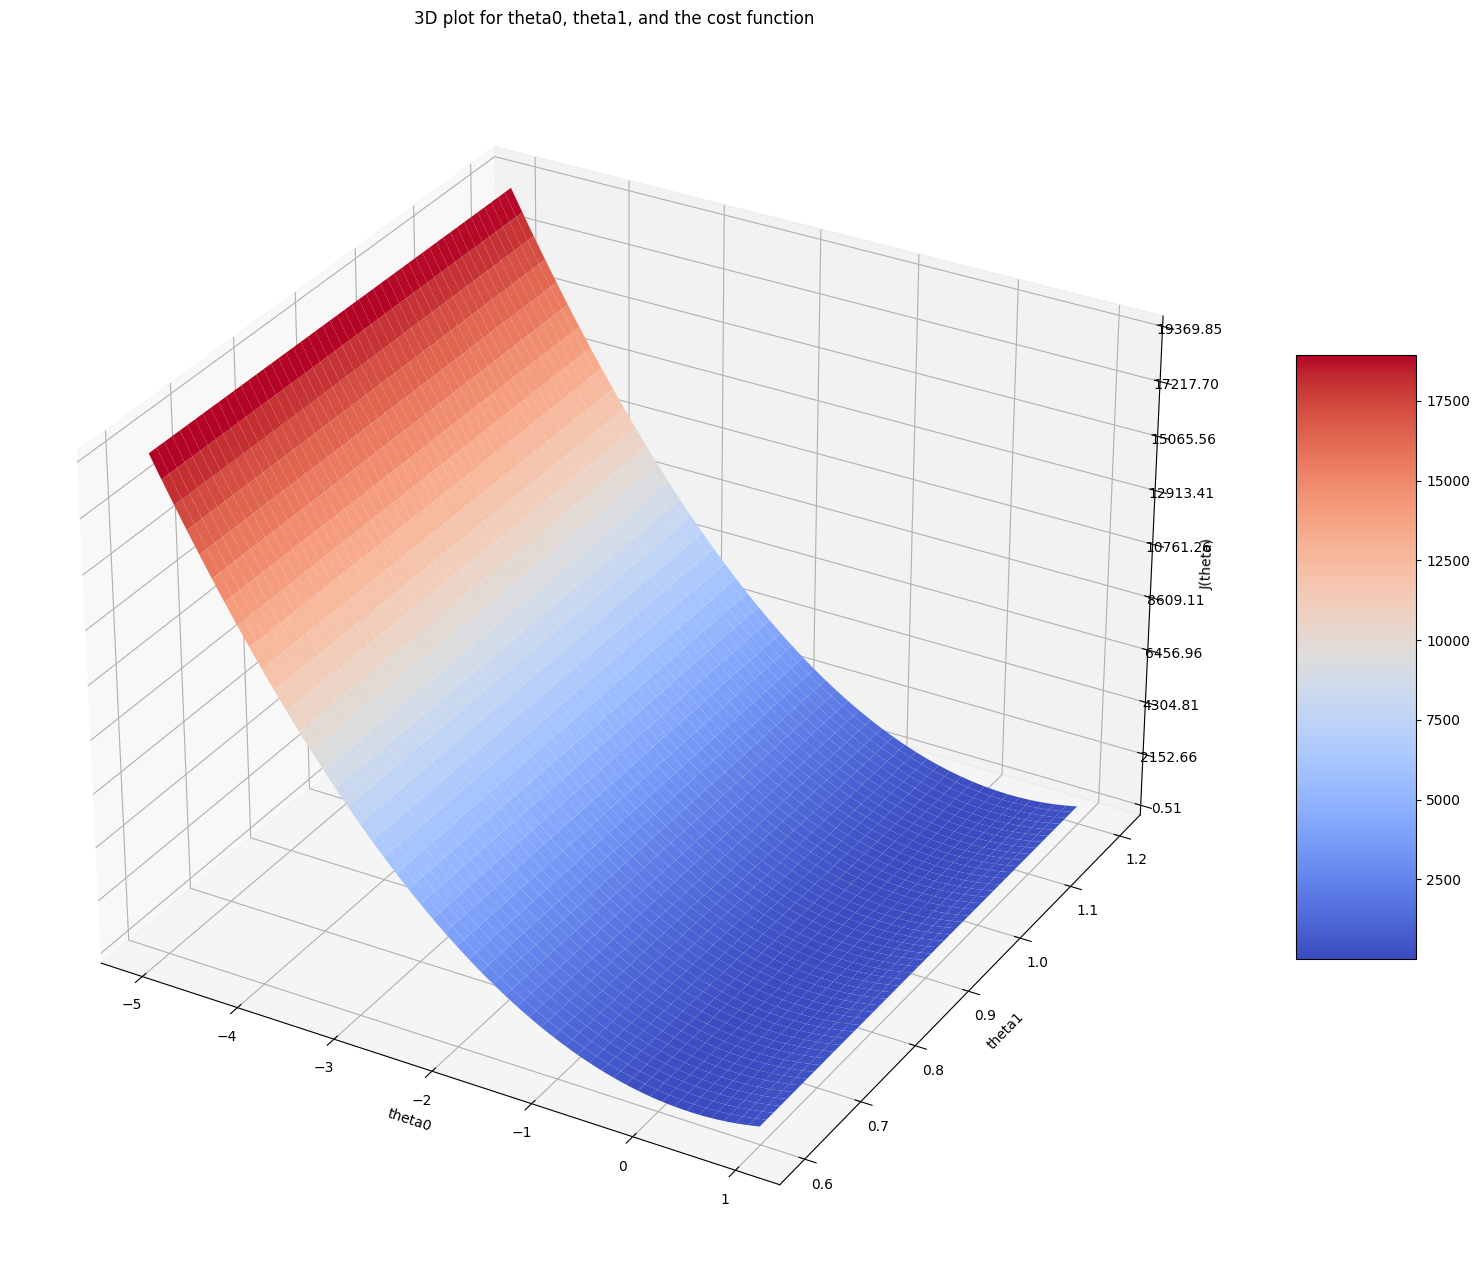

In [78]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(num=None, figsize=(20, 16), dpi=100, facecolor='w')
ax = fig.gca(projection='3d')

surf = ax.plot_surface(theta_0, theta_1, J_matrix, cmap=cm.coolwarm,)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.set_xlabel("theta0")
ax.set_ylabel("theta1")
ax.set_zlabel("J(theta)")
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title("3D plot for theta0, theta1, and the cost function\n")
plt.show()

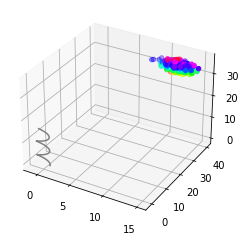

In [79]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z_line = np.linspace(0, 15, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')

z_points = custdetails['Avg. Session Length']
x_points = custdetails['Time on App']
y_points = custdetails['Time on Website']
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()

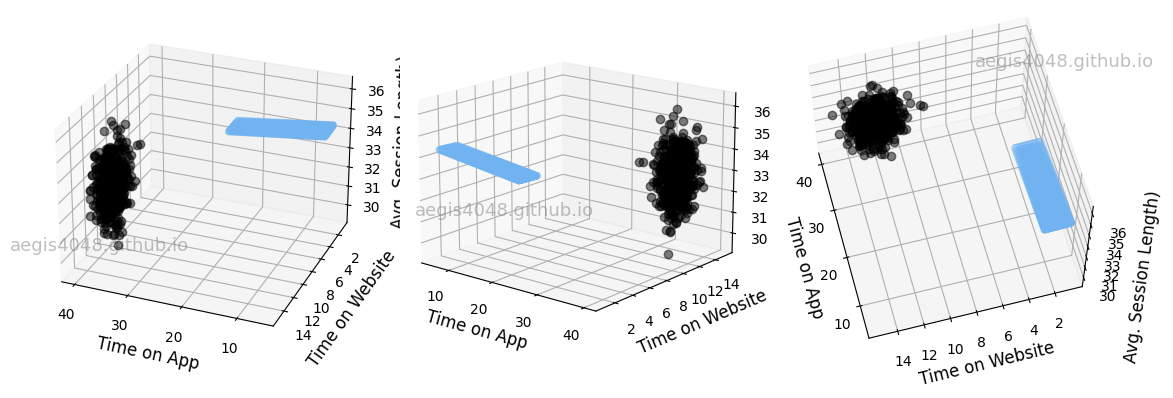

In [80]:
from sklearn import linear_model

X = custdetails[['Time on Website', 'Time on App']].values.reshape(-1,2)
Y = custdetails['Avg. Session Length']

x = custdetails['Time on Website']
y = custdetails['Time on App']
z = custdetails['Avg. Session Length']

x_pred = np.linspace(6, 24, 30)
y_pred = np.linspace(0.93, 2.9, 30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

r2 = model.score(X, Y)

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Time on App', fontsize=12)
    ax.set_ylabel('Time on Website', fontsize=12)
    ax.set_zlabel('Avg. Session Length)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()

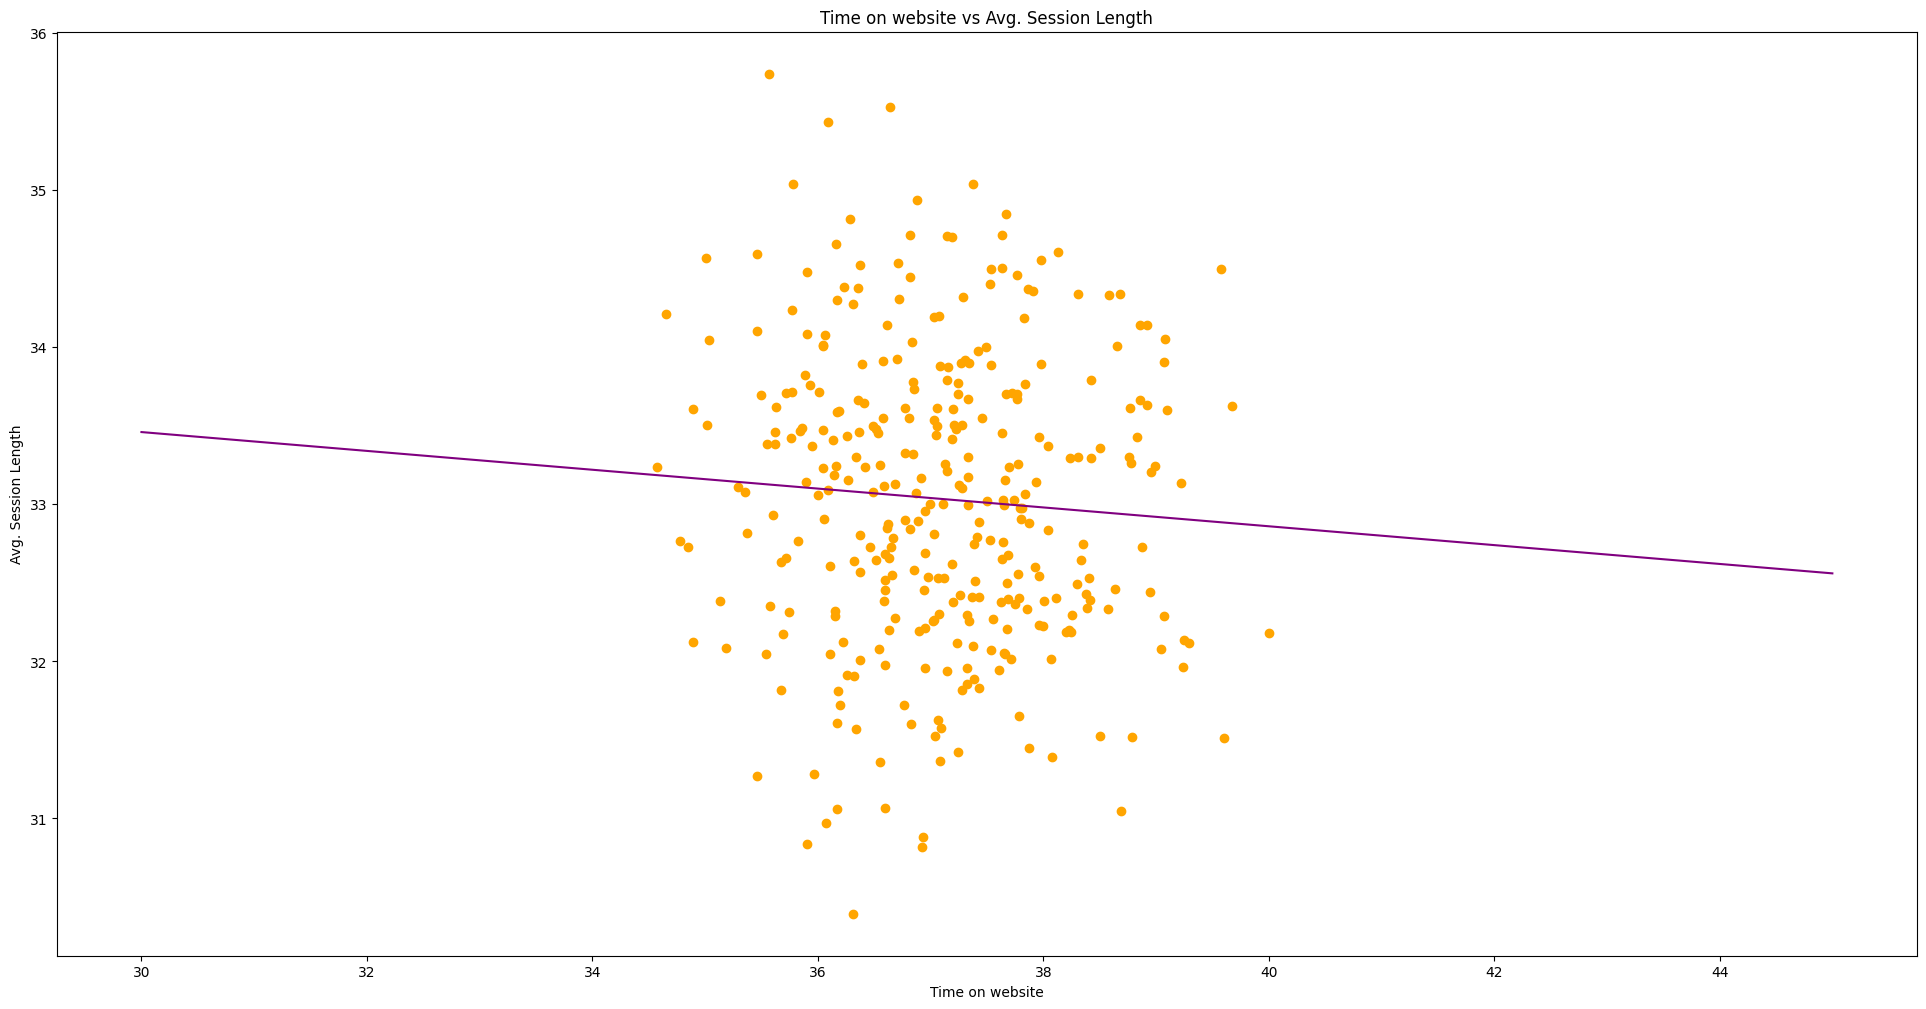

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('ec.txt')

to_del = ['Email','Address','Avatar']
df.drop(to_del, axis=1, inplace=True)

X = df.iloc[:, 2]
y = df.iloc[:, 0]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3.0, random_state=0)
X_train = X_train.values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test.values.reshape(-1, 1))

fig = plt.figure(figsize=(24, 12))
plt.scatter(X_train, y_train, color='orange')
plt.plot(np.arange(30, 60, 15), regressor.predict(np.arange(30, 60, 15).reshape(-1, 1)), color='purple')
plt.title('Time on website vs Avg. Session Length')
plt.xlabel('Time on website')
plt.ylabel('Avg. Session Length')
plt.show()

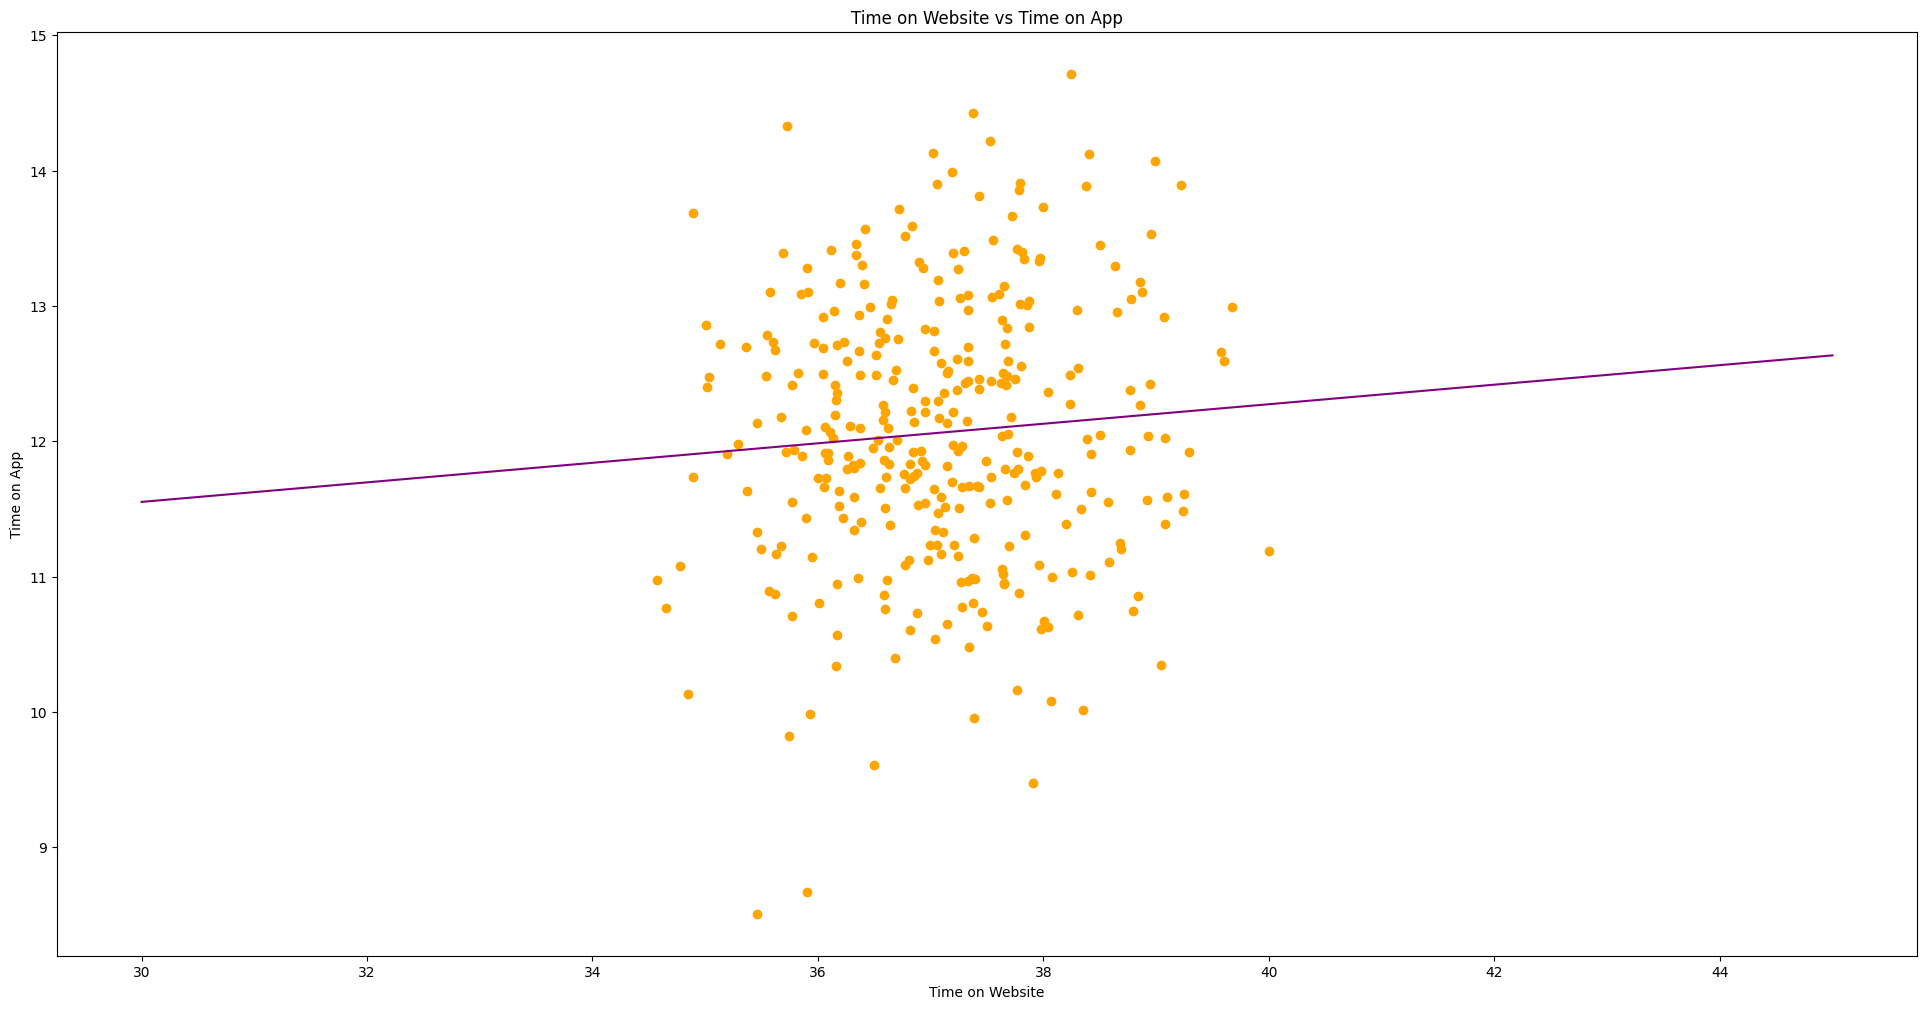

In [82]:
X = df.iloc[:, 2]
y = df.iloc[:, 1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3.0, random_state=0)
X_train = X_train.values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test.values.reshape(-1, 1))

fig = plt.figure(figsize=(24, 12))
plt.scatter(X_train, y_train, color='orange')
plt.plot(np.arange(30, 60, 15), regressor.predict(np.arange(30, 60, 15).reshape(-1, 1)), color='purple')
plt.title('Time on Website vs Time on App')
plt.xlabel('Time on Website')
plt.ylabel('Time on App')
plt.show()

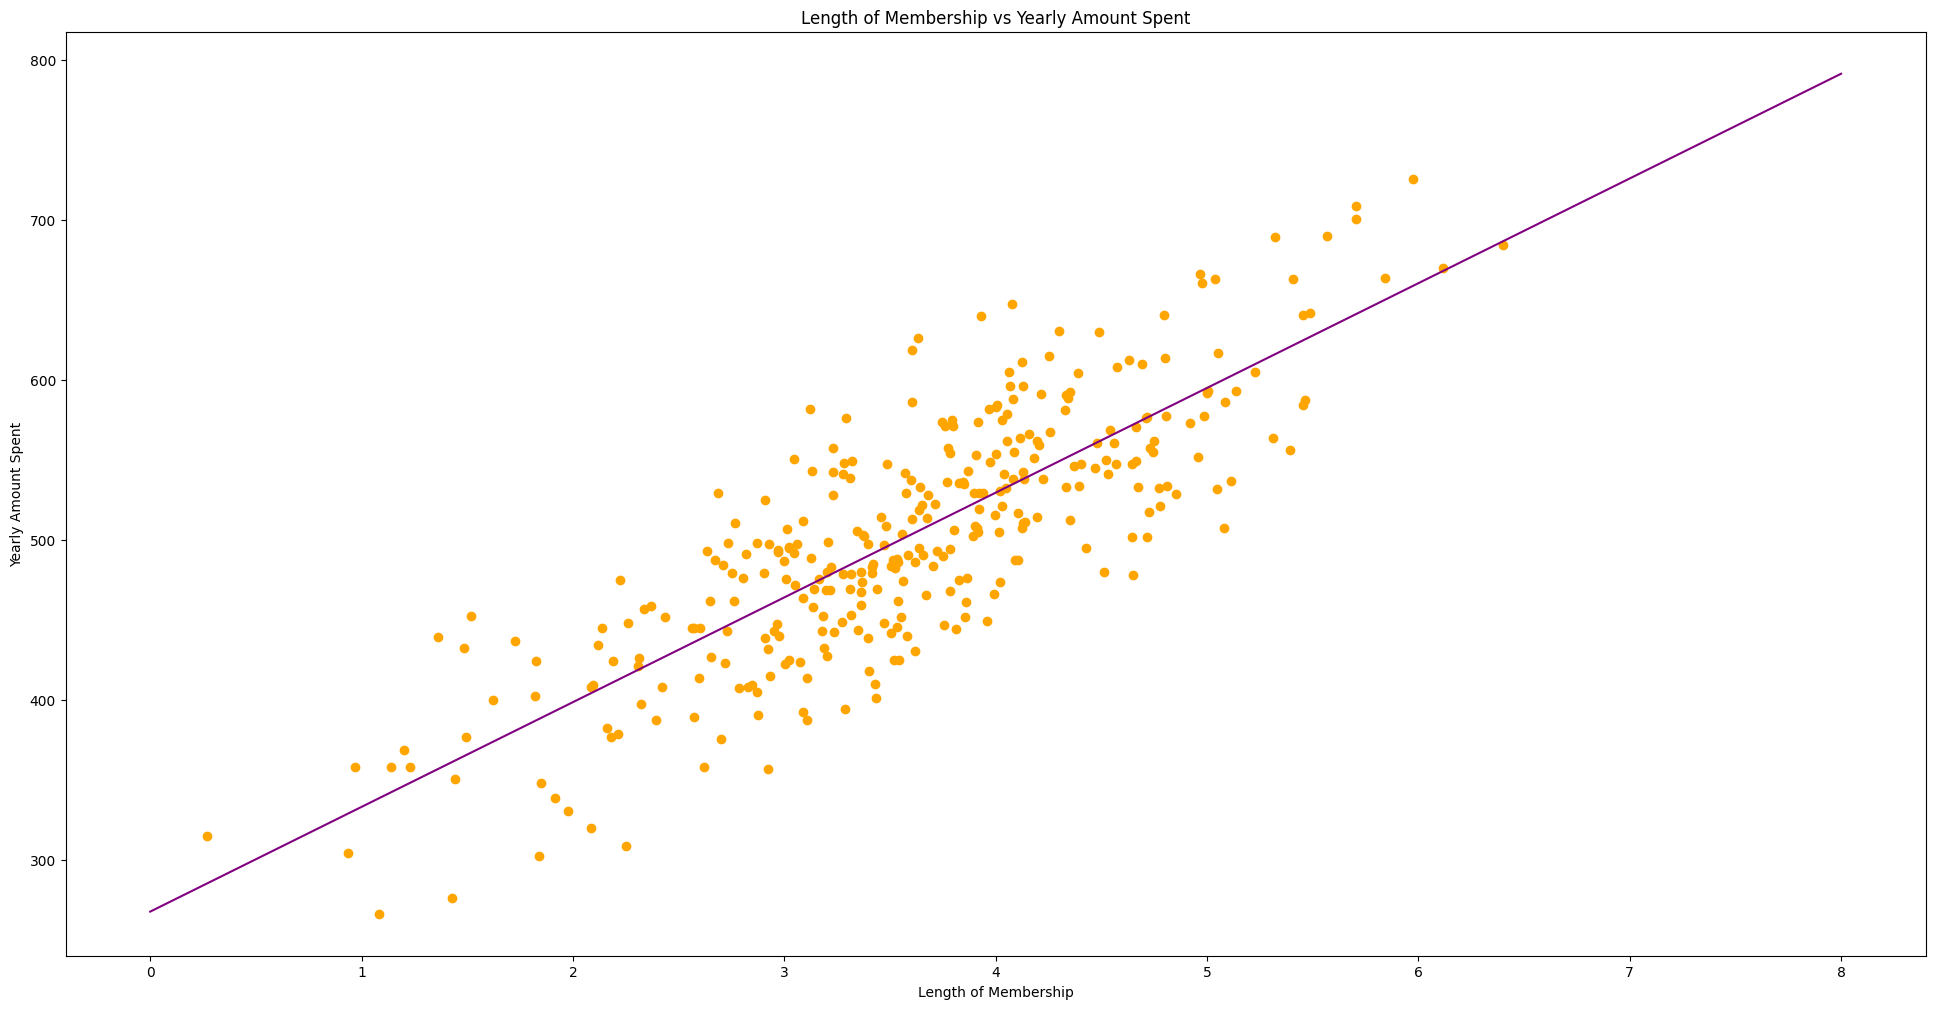

In [83]:
X = df.iloc[:, 3]
y = df.iloc[:, 4]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3.0, random_state=0)
X_train = X_train.values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test.values.reshape(-1, 1))

fig = plt.figure(figsize=(24, 12))
plt.scatter(X_train, y_train, color='orange')
plt.plot(np.arange(0, 10, 2), regressor.predict(np.arange(0, 10, 2).reshape(-1, 1)), color='purple')
plt.title('Length of Membership vs Yearly Amount Spent')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.show()

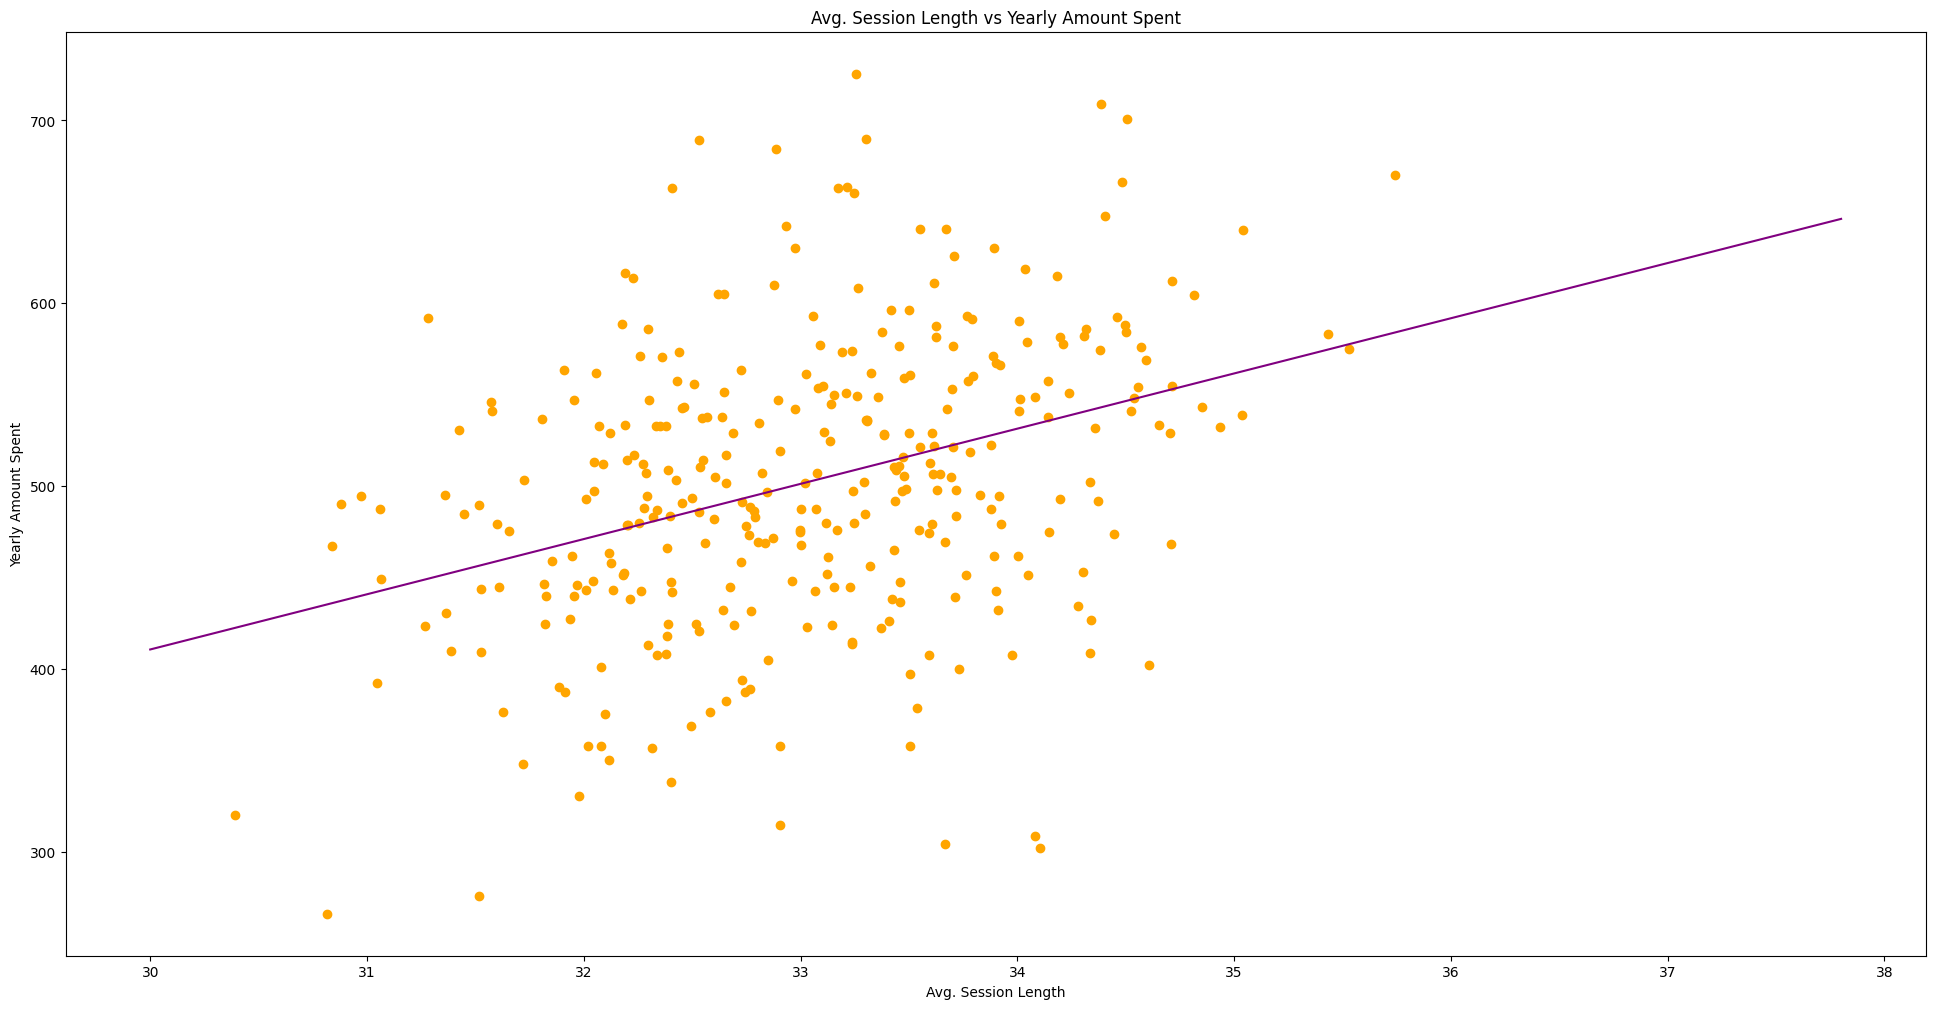

In [84]:
X = df.iloc[:, 0]
y = df.iloc[:, 4]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3.0, random_state=0)
X_train = X_train.values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test.values.reshape(-1, 1))

fig = plt.figure(figsize=(24, 12))
plt.scatter(X_train, y_train, color='orange')
plt.plot(np.arange(30, 38, 0.2), regressor.predict(np.arange(30, 38, 0.2).reshape(-1, 1)), color='purple')
plt.title('Avg. Session Length vs Yearly Amount Spent')
plt.xlabel('Avg. Session Length')
plt.ylabel('Yearly Amount Spent')
plt.show()

## __Conclusion__

1. After the analysis we have observed that the mobile app needs more attention.
2. The website is doing good.